https://www.kaggle.com/gpayen/d/snap/amazon-fine-food-reviews/building-a-prediction-model

In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

/home/manobhav/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
import os
os.chdir('/home/manobhav/PycharmProjects/demonetisation analysis')
data=pd.read_excel('Data/updated_articlesexcel.xlsx')
data.head(11)

,article_body,category,city,date,heading,sentiment,link,paper,lat,long,state
0,The currency demonetization came as a surprise...,entertainment,NaN,"Updated: Jan 24, 2017, 12.52 PM IST",Kannada film shoots stalled because of demonet...,-1,http://timesofindia.indiatimes.com//entertainm...,toi,NaN,NaN,NaN
1,CHENNAI: Travellers and tourists had a tough t...,city,chennai,"Nov 10, 2016, 01.47 AM IST","Demonetisation puts tourists in trouble, spoil...",-1,http://timesofindia.indiatimes.com//city/chenn...,toi,13.082680,80.270718,Tamil Nadu
2,PANAJI: Fortunes of the five offshore casino o...,city,goa,"Updated: Nov 10, 2016, 12.28 PM IST",Currency demonetization puts odds against casinos,-1,http://timesofindia.indiatimes.com//city/goa/C...,toi,15.299326,74.123996,Goa
3,Even as gold prices surged to a four-month hig...,business,NaN,"Nov 10, 2016, 04.00 AM IST","Demonetisation hits jewellery, realty stocks",-1,http://timesofindia.indiatimes.com//business/i...,toi,NaN,NaN,NaN
4,"Nagpur: Like most parts of the country, the ci...",city,nagpur,"Nov 10, 2016, 04.23 AM IST",Vid towns witness chaos following demonetization,-1,http://timesofindia.indiatimes.com//city/nagpu...,toi,21.145800,79.088155,Maharashtra
5,"Nagpur: According to experts, educational inst...",city,nagpur,"Nov 10, 2016, 04.24 AM IST",Demonetization to hit private colleges hard,-1,http://timesofindia.indiatimes.com//city/nagpu...,toi,21.145800,79.088155,Maharashtra
6,KOLHAPUR: The first day after Prime Minister N...,city,kolhapur,"Updated: Nov 10, 2016, 06.32 AM IST",Centre's demonetisation move impacts businesse...,-1,http://timesofindia.indiatimes.com//city/kolha...,toi,16.704987,74.243253,Maharashtra
7,"KOCHI: Demonetization of Rs 1,000 and Rs 500 n...",city,kochi,"Nov 10, 2016, 07.18 AM IST",Demonetisation move to curb Kerala's undergrou...,1,http://timesofindia.indiatimes.com//city/kochi...,toi,9.931233,76.267304,Kerala
8,"HUBBALLI: Panic struck Hubballi, known as the ...",city,hubballi,"Updated: Nov 10, 2016, 08.29 AM IST",Panic in Hubballi after the demonetization of ...,-1,http://timesofindia.indiatimes.com//city/hubba...,toi,15.364708,75.123955,Karnataka
9,COIMBATORE: DMK treasurer M K Stalin has welco...,city,coimbatore,"Updated: Nov 10, 2016, 08.47 AM IST",Stalin welcomes demonetization of high denomin...,1,http://timesofindia.indiatimes.com//city/coimb...,toi,11.016844,76.955832,Tamil Nadu


In [4]:
data.describe()

,sentiment,lat,long
count,199.000000,133.000000,133.000000
mean,-0.211055,19.266066,78.594773
std,0.844279,6.120043,4.427013
min,-1.000000,8.524139,72.571362
25%,-1.000000,13.082680,75.787271
50%,0.000000,20.296059,78.119775
75%,1.000000,25.317645,80.331874
max,1.000000,30.733315,93.605316


In [5]:
data.sentiment.value_counts()

-1    96
 1    54
 0    49
Name: sentiment, dtype: int64

In [6]:
data1=data[data.sentiment!=0]
data1.sentiment.value_counts()

-1    96
 1    54
Name: sentiment, dtype: int64

In [7]:
body=data1.article_body
sentiment=data1.sentiment
X_train,X_test,y_train,y_test=train_test_split(body,sentiment,test_size=0.2,random_state=42)

In [8]:
stemmer=PorterStemmer()
from nltk.corpus import stopwords
def stem_tokens(tokens,stemmer):
    stemmed=[]
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens=nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    stems=stem_tokens(tokens,stemmer)
    return ' '.join(stems)

def clean(array):
    corpus=[]
    for text in array:
        text=text.lower()
        text=tokenize(text)
        corpus.append(text)
    return corpus

corpus=clean(X_train)



In [9]:
count_vec=CountVectorizer()
X_train_cv=count_vec.fit_transform(corpus)
count_vec.get_feature_names()

['00',
 '000',
 '01percentag',
 '02',
 '02celeb',
 '03',
 '04',
 '05',
 '06',
 '062',
 '09',
 '10',
 '100',
 '1000',
 '10day',
 '11',
 '116',
 '11am',
 '12',
 '120',
 '124',
 '125',
 '13',
 '1324',
 '1351',
 '136',
 '14',
 '140',
 '140crore',
 '15',
 '150',
 '16',
 '16th',
 '17',
 '170',
 '18',
 '19',
 '1925',
 '1950',
 '1960',
 '1964',
 '1965',
 '1967',
 '1969',
 '1970',
 '1973',
 '1978',
 '1980',
 '1987',
 '1990',
 '1993',
 '1998',
 '1999',
 '1kg',
 '1pm',
 '20',
 '200',
 '2000',
 '2002',
 '2003',
 '2004',
 '2005',
 '2007',
 '2008',
 '2009',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '202',
 '21',
 '211',
 '217',
 '23',
 '233',
 '24',
 '25',
 '250',
 '2500',
 '257',
 '26',
 '27',
 '28',
 '29',
 '29th',
 '30',
 '300',
 '31',
 '314',
 '31lakh',
 '32',
 '33',
 '34',
 '35',
 '350',
 '36',
 '37',
 '38',
 '395',
 '40',
 '400',
 '43',
 '44',
 '441',
 '45',
 '455',
 '45th',
 '47',
 '48',
 '49',
 '4lakh',
 '4pm',
 '50',
 '500',
 '5001',
 '500rs1000',
 '50day',
 '51crore',
 '52',
 

In [10]:
pd.DataFrame(X_train_cv.toarray(),columns=count_vec.get_feature_names())

,00,000,01percentag,02,02celeb,03,04,05,06,062,...,yuvraj,zari,zaveri,zealous,zero,zip,zo,zonal,zone,zushan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,1,2,0,0,1,1,0,2,1,1,...,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_cv)
pd.DataFrame(X_train_tfidf.toarray(),columns=count_vec.get_feature_names())

,00,000,01percentag,02,02celeb,03,04,05,06,062,...,yuvraj,zari,zaveri,zealous,zero,zip,zo,zonal,zone,zushan
0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.035679,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.004975,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.036345,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.034548,0.0,0.000000,0.000000,0.000000,0.000000
6,0.006796,0.004278,0.0,0.000000,0.007383,0.006796,0.0,0.013592,0.006796,0.007383,...,0.007383,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.057023,0.000000,0.000000
8,0.000000,0.023652,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [78]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(X_train_cv)
cos_bool=pd.DataFrame(cos_sim)>0.7

In [79]:
xcos,ycos=np.where(cos_bool)
Y_cos=pd.DataFrame(data={'a':xcos,'b':ycos})
Y_cos[Y_cos.a!=Y_cos.b]

,a,b
13,12,95
46,44,79
50,47,105
82,79,44
85,80,99
100,95,12
105,99,80
112,105,47


In [82]:
from sklearn.metrics.pairwise import euclidean_distances
ed_sim=euclidean_distances(X_train_cv)
ed_bool=pd.DataFrame(ed_sim)<0.5

In [83]:
xed,yed=np.where(ed_bool)
Y_ed=pd.DataFrame(data={'a':xed,'b':yed})
Y_ed[Y_ed.a!=Y_ed.b]

,a,b
13,12,95
46,44,79
50,47,105
82,79,44
85,80,99
100,95,12
105,99,80
112,105,47


In [91]:
data.loc[26]

article_body    VARANASI: Of all the one liners, jokes and mem...
category                                                     city
city                                                     varanasi
date                          Updated: Nov 11, 2016, 10.02 AM IST
heading         Demonetization move makes housewives reveal th...
sentiment                                                       0
link            http://timesofindia.indiatimes.com//city/varan...
paper                                                         toi
lat                                                       25.3176
long                                                      82.9739
state                                               Uttar Pradesh
Name: 26, dtype: object

In [89]:
data[].all(axis=1)

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10     False
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26     False
27     False
28     False
29      True
       ...  
169    False
170     True
171     True
172    False
173    False
174    False
175     True
176     True
177     True
178     True
179    False
180     True
181     True
182     True
183    False
184    False
185     True
186    False
187     True
188    False
189     True
190    False
191     True
192     True
193    False
194     True
195     True
196     True
197    False
198     True
dtype: bool

In [12]:
prediction=dict()
test_set=clean(X_test)
X_test_tfidf=tfidf_transformer.transform(count_vec.transform(test_set))

In [13]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB().fit(X_train_tfidf,y_train)
prediction['Multinomial']=model.predict(X_test_tfidf)

In [14]:
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB().fit(X_train_tfidf,y_train)
prediction['Bernoulli']=model.predict(X_test_tfidf)

In [15]:
from sklearn import linear_model
logreg=linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train_tfidf,y_train)
prediction['Logistic']=logreg.predict(X_test_tfidf)

In [16]:
prediction['Logistic']

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1,  1, -1])

In [17]:
print(metrics.classification_report(y_test, prediction['Bernoulli']))

             precision    recall  f1-score   support

         -1       0.52      1.00      0.68        15
          1       1.00      0.07      0.12        15

avg / total       0.76      0.53      0.40        30



In [18]:
metrics.accuracy_score(y_test, prediction['Logistic'])

0.6333333333333333

In [19]:
metrics.accuracy_score(y_test, prediction['Bernoulli'])

0.53333333333333333

In [20]:
metrics.accuracy_score(y_test, prediction['Multinomial'])

0.5

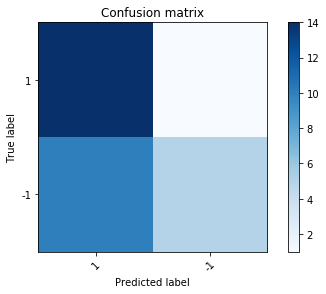

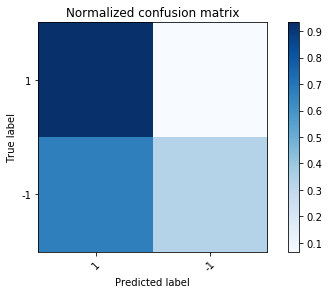

In [21]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(sentiment)))
    plt.xticks(tick_marks, set(sentiment), rotation=45)
    plt.yticks(tick_marks, set(sentiment))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cm = confusion_matrix(y_test, prediction['Logistic'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

In [22]:
cmp=0
colors=['b','g','y','m','k']

for model,predicted in prediction.items():
    false_p_rate,true_p_rate,threshold=roc_curve(y_test,predicted)
    roc_auc=auc(false_p_rate,true_p_rate)
    plt.plot(false_p_rate,true_p_rate,colors[cmp],label='%s: AUC %0.2f'% (model,roc_auc))
    cmp+=1
    
    

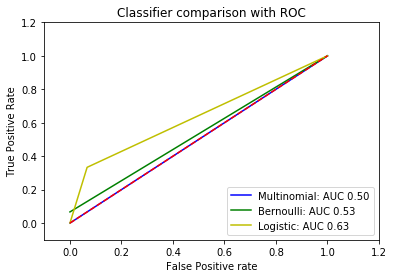

In [23]:
plt.title('Classifier comparison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive rate')
plt.show()